## Loading the Wisconsin dataset from sklearn

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
import random
inputs,outputs=load_breast_cancer(return_X_y=True)

## Understanding the data

In [2]:
dataset=pd.DataFrame(inputs)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [4]:
# No missing data

# Splitting the data into train and test

In [5]:
x_train,x_test,y_train,y_test=train_test_split(inputs,outputs,test_size=0.3,random_state=1)

## Decision tree classifier

In [6]:
# Creating a decision dree classifier object
from sklearn.tree import DecisionTreeClassifier
dtClassifier=DecisionTreeClassifier(random_state=1)

In [7]:
# Using K Fold cross validation

k_fold=KFold(n_splits=5,random_state=1,shuffle=True)
scores=[]
for train_index,test_index in k_fold.split(inputs):
    x_train=inputs[train_index]
    y_train=outputs[train_index]
    x_test=inputs[test_index]
    y_test=outputs[test_index]
    
    dtClassifier.fit(x_train,y_train)
    scores.append(dtClassifier.score(x_test,y_test))
    

/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

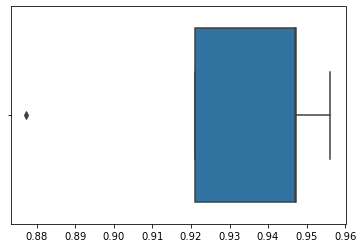

In [8]:
import seaborn as sns
sns.boxplot(scores)

In [9]:
decision_tree_scores=[sum(scores)/len(scores)*100]
print('Average score is : ',decision_tree_scores[0])

Average score is :  92.97314081664338


## Bagging Classifier / Random Forests

In [10]:
random_forest=BaggingClassifier(base_estimator=dtClassifier,n_estimators=20,random_state=1)

In [11]:
# Using K Fold cross validation

k_fold=KFold(n_splits=5,random_state=1,shuffle=True)
scores=[]
for train_index,test_index in k_fold.split(inputs):
    x_train=inputs[train_index]
    y_train=outputs[train_index]
    x_test=inputs[test_index]
    y_test=outputs[test_index]
    
    random_forest.fit(x_train,y_train)
    scores.append(dtClassifier.score(x_test,y_test))
    

/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

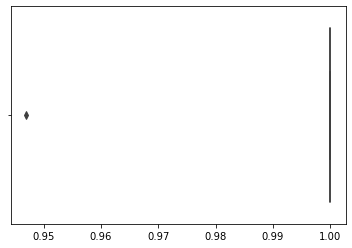

In [12]:
import seaborn as sns
sns.boxplot(scores)

In [13]:
random_forest_scores=[sum(scores)/len(scores)*100]
print('Average score is : ',random_forest_scores[0])

Average score is :  98.93805309734513


<h3> Comparing the results of Decision tree and Random Forest Classifier </h3>
<body>
   It can be seen that on using a single Decision tree Classifier, the accuracy was varying from 82 to 96 % and there was a high variance in results of cross validation. 
    
    However, next a Random forest was applied where 20 different decision trees were used as estimators to create different outputs, which were then combined to get a final output. Here, we can see that accuracy has increased for most of the validation sets 
    
</body>


## Adding 10% noise to 25 % of the data

In [14]:
inputs.shape

(569, 30)

In [15]:
def generate_noise(data):
    ''' The function would add some positie or nrgative random noise to the data
    '''
    
    sign=random.randint(0,1) # Generating if positive or negative noise to be added
    noise_percentage=random.randint(10,50)/100
    if sign:
        data=data+(data*noise_percentage)
    else:
        data=data-(data*noise_percentage)
    return data

In [16]:
# There are 569*30 data points. 25% of them has to be added with 10% noise
# ie 4267 data points has to be added with noise
def random_noise_adder(data):
    """ The function takes as input the shape tuple returned by data.shape
    and adds random noise to 25 % of it
    Returns the indexes"""
    dummy=data
    shape_tuple=data.shape
    size=shape_tuple[0]*shape_tuple[1]
    noise_amount=int(size*0.25)
    x=[random.randint(0,shape_tuple[0]-1) for i in range(noise_amount)]
    y=[random.randint(0,shape_tuple[1]-1) for i in range(noise_amount)]
    
    return x,y



In [17]:
new_inputs=inputs
print(new_inputs.sum())

1056474.4596356


In [18]:
x_index,y_index=random_noise_adder(inputs)

In [19]:
for i,j in zip(x_index,y_index):
    new_inputs[i][j]=generate_noise(inputs[i][j])


In [20]:
print(new_inputs.sum())

1053879.804434082


#### Since the sum has changed for the entire dataset, we can see that noise has been added

## Decision tree classifier

In [21]:
# Creating a decision dree classifier object
from sklearn.tree import DecisionTreeClassifier
dtClassifier=DecisionTreeClassifier(random_state=1)

In [22]:
# Using K Fold cross validation

k_fold=KFold(n_splits=5,random_state=1,shuffle=True)
scores=[]
for train_index,test_index in k_fold.split(new_inputs):
    x_train=new_inputs[train_index]
    y_train=outputs[train_index]
    x_test=new_inputs[test_index]
    y_test=outputs[test_index]
    
    dtClassifier.fit(x_train,y_train)
    scores.append(dtClassifier.score(x_test,y_test))
    

/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

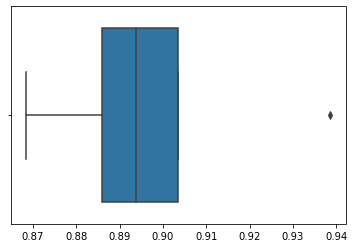

In [23]:
import seaborn as sns
sns.boxplot(scores)

In [24]:
decision_tree_scores.append(sum(scores)/len(scores)*100)
print('Average score is : ',sum(scores)/len(scores)*100)

Average score is :  89.80593075609377


## Bagging Classifier / Random Forests

In [25]:
random_forest=BaggingClassifier(base_estimator=dtClassifier,n_estimators=20,random_state=1)

In [26]:
# Using K Fold cross validation

k_fold=KFold(n_splits=5,random_state=1,shuffle=True)
scores=[]
for train_index,test_index in k_fold.split(new_inputs):
    x_train=new_inputs[train_index]
    y_train=outputs[train_index]
    x_test=new_inputs[test_index]
    y_test=outputs[test_index]
    
    random_forest.fit(x_train,y_train)
    scores.append(dtClassifier.score(x_test,y_test))
    

/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

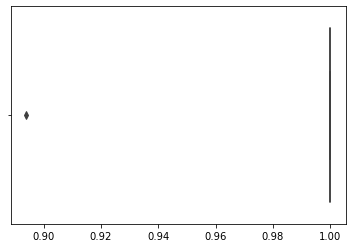

In [27]:
import seaborn as sns
sns.boxplot(scores)

In [28]:
random_forest_scores.append(sum(scores)/len(scores)*100)
print('Average score is : ',sum(scores)/len(scores)*100)

Average score is :  97.87610619469027


# Creating a dataframe to summarise the results


In [29]:
import pandas as pd
summary=pd.DataFrame()
summary['Decision Tree Score']=decision_tree_scores
summary['Random Forest Score']=random_forest_scores
summary.index=['Without Noise','With Noise']


In [30]:
summary

,Decision Tree Score,Random Forest Score
Without Noise,92.973141,98.938053
With Noise,89.805931,97.876106


It can be seen that the difference between decision tree and random forests increases on a dataset with noise. 
It can also be seen that the Decision tree doesnt work well with noise, but as the random forest contains many decision trees which are low performing, it performs better on dataset with noise and without noise. 